##import_the_libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

Link: https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

In [50]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

##analysis_of_the_dataset

In [51]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [52]:
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [53]:
df.ndim

2

In [54]:
df.shape

(891, 12)

In [55]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:

df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [58]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##visualisation_of_the_dataset

#####check_the_nullvalue_with_heatmap

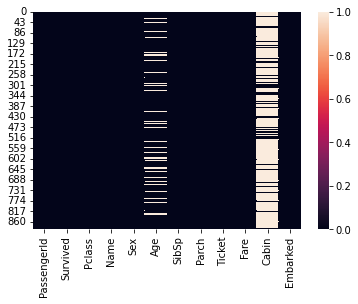

In [60]:
sns.heatmap(df.isnull())

####survived_count_with_sex

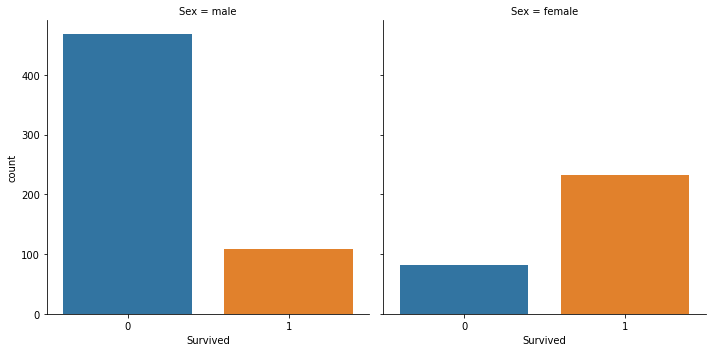

In [61]:
sns.catplot(x='Survived', col='Sex', kind='count', data=df)
plt.show()

####survived_count_with_Pclass

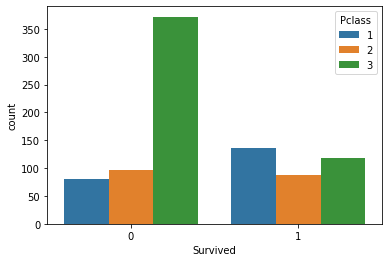

In [62]:
sns.countplot(x='Survived', hue='Pclass', data=df)

In [63]:
df.isnull().Age

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

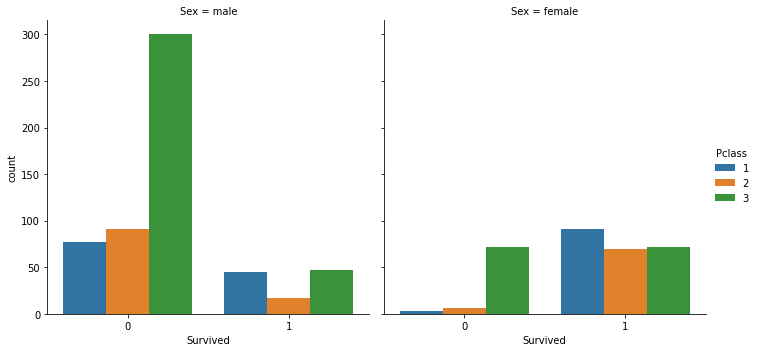

In [64]:
sns.catplot(x='Survived', col='Sex', hue='Pclass', kind='count', data=df)

In [65]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


####disribute_the_age_with_count

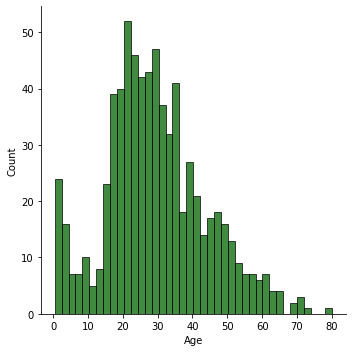

In [69]:
sns.displot(df['Age'].dropna(),kde = False, color = 'darkgreen', bins = 40)

In [ ]:
#df['Age'].hist(bins=30, color = 'darkgreen', alpha = 0.3)      #Dis plot through matplotlib 

####count_of_the_siblings/spouse_on_the_ship

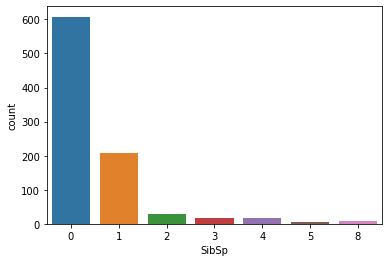

In [30]:
sns.countplot(x = 'SibSp', data = df)

##data_cleaning

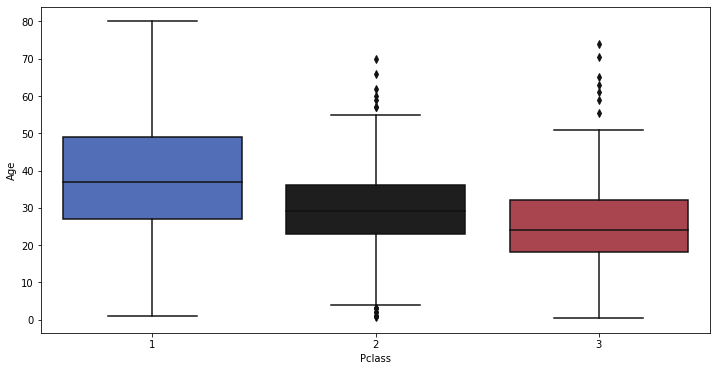

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'Pclass', y = 'Age', data = df, palette = 'icefire')

####conditonal_formatting_for_fill_nullvalues

In [24]:
def  impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else : 
      return 20
  else: 
   return Age

#####apply_that_function

In [25]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis = 1)

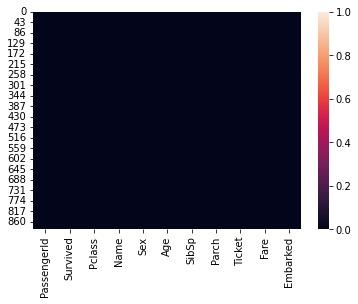

In [26]:
sns.heatmap(df.isnull())

In [71]:
df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [72]:
df.head(1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,22.0,1,0,7.25,NaN


##Building_a_Logistic_Regression_model

####splitting_the_dataset_into_train_and_test

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Survived', axis =1), df['Survived'], test_size = 0.30, random_state = 101)

####feature_scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[ 2.83845528e-01 -1.59418307e+00  1.30086559e-01 -4.91310491e-01
  -4.84325166e-01  1.39097165e+00]
 [ 2.45006133e-01  8.19367482e-01  5.50688086e-02 -4.91310491e-01
  -4.84325166e-01 -5.21705835e-01]
 [-3.56599258e-03 -3.87407793e-01 -1.14521520e+00 -4.91310491e-01
   7.22613148e-01 -2.59618832e-01]
 ...
 [-4.26915395e-01 -1.59418307e+00  9.55281812e-01 -4.91310491e-01
  -4.84325166e-01  2.30548800e+00]
 [ 2.95497347e-01 -1.59418307e+00  1.18033506e+00 -4.91310491e-01
   7.22613148e-01  5.98670375e-01]
 [ 1.61603677e+00  8.19367482e-01 -6.20090944e-01  6.48501854e+00
   1.92955146e+00  8.56760272e-01]]


####training_the_model

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 101)
model.fit(X_train, Y_train)

LogisticRegression(random_state=101)

####prediction_with_confusion_matrix

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [42]:
predictions = model.predict(X_test)

In [43]:
accuracy = confusion_matrix(Y_test, predictions)
accuracy

array([[133,  21],
       [ 62,  52]])

In [44]:
accuracy = accuracy_score(Y_test, predictions)
accuracy

0.6902985074626866

In [45]:
predictions

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0])